In [2]:
import pandas as pd
import os
from datetime import datetime
from dateutil import parser
import re
import matplotlib.pyplot as plt

### Import

In [14]:
vaccine_data = pd.read_csv('/Users/atmavidyavirananda/Desktop/My Data Projects/Projects & Comps/TSDN/Cleaned Vaccine & COVID data/'+'vaccine_data.csv')
covid_data = pd.read_csv('/Users/atmavidyavirananda/Desktop/My Data Projects/Projects & Comps/TSDN/Cleaned Vaccine & COVID data/'+'covid_data.csv')

### Preview Data

In [4]:
pd.set_option('display.max_columns', None)

In [7]:
display(vaccine_data.head(), covid_data.head())

,kode kelurahan,wilayah kota,kecamatan,kelurahan,sasaran,belum vaksin,jumlah dosis 1,jumlah dosis 2,total vaksin diberikan,lansia dosis 1,lansia dosis 2,lansia total vaksin diberikan,pelayan publik dosis 1,pelayan publik dosis 2,pelayan publik total vaksin diberikan,gotong royong dosis 1,gotong royong dosis 2,gotong royong total vaksin diberikan,tenaga kesehatan dosis 1,tenaga kesehatan dosis 2,tenaga kesehatan total vaksin diberikan,tahapan 3 dosis 1,tahapan 3 dosis 2,tahapan 3 total vaksin diberikan,remaja dosis 1,remaja dosis 2,remaja total vaksin diberikan,date
0,3.172051e+09,JAKARTA UTARA,PADEMANGAN,ANCOL,23947,9067,14880,9678,24558,1302,1147,2449,4201,3269,7470,89,82,171,107,96,203,7481.0,3765.0,11246.0,1700.0,1319.0,3019.0,2021-09-03
1,3.173041e+09,JAKARTA BARAT,TAMBORA,ANGKE,29381,10275,19106,11138,30244,2108,1869,3977,3649,2629,6278,137,120,257,92,85,177,11124.0,4973.0,16097.0,1996.0,1462.0,3458.0,2021-09-03
2,3.175041e+09,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,29074,12345,16729,8480,25209,1056,789,1845,4301,2663,6964,188,165,353,229,204,433,8838.0,3380.0,12218.0,2117.0,1279.0,3396.0,2021-09-03
3,3.175031e+09,JAKARTA TIMUR,JATINEGARA,BALI MESTER,9752,3664,6088,3894,9982,917,825,1742,1371,1030,2401,80,71,151,78,74,152,3038.0,1481.0,4519.0,604.0,413.0,1017.0,2021-09-03
4,3.175101e+09,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,26285,9218,17067,11250,28317,1443,1272,2715,4574,3505,8079,146,114,260,380,345,725,8342.0,4341.0,12683.0,2182.0,1673.0,3855.0,2021-09-03


,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,suspek,perawatan rs,isolasi di rumah,suspek meninggal,selesai isolasi,probable,perawatan rs.1,isolasi di rumah.1,probable meninggal,selesai isolasi.1,pelaku perjalanan,perawatan rs.2,isolasi di rumah.2,selesai isolasi.2,kontak erat,perawatan rs.3,isolasi di rumah.3,selesai isolasi.3,discarded,isolasi di rumah.4,meninggal,selesai isolasi.4,positif,dirawat,sembuh,meninggal.1,self isolation,keterangan,date
0,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959,6,932,12,9,NaN,2021-05-04
1,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769,3,749,14,3,NaN,2021-05-04
2,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998,12,961,19,6,NaN,2021-05-04
3,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392,1,381,8,2,NaN,2021-05-04
4,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1114,19,1067,15,13,NaN,2021-05-04


Let's have a look at the vaccine and covid data in DKI Jakarta.

In [15]:
# Columns we are interested in
vaccine_attr = sorted(vaccine_data.loc[:,'sasaran':'remaja total vaksin diberikan'].columns.tolist())
covid_attr = sorted(covid_data.loc[:,'positif':'self isolation'].columns.tolist())

# Aggregate vaccine and COVID data by date and subcity
vaccine_agg = vaccine_data.groupby(['date','wilayah kota'])[vaccine_attr].sum()

covid_jakarta = covid_data.loc[covid_data['nama_provinsi']=='DKI JAKARTA',:]
covid_agg = covid_jakarta.groupby(['date','nama_kota'])[covid_attr].sum()


In [19]:
## Preview aggregated df
display(vaccine_agg.head(), covid_agg.head())

,date,wilayah kota,belum vaksin,gotong royong dosis 1,gotong royong dosis 2,gotong royong total vaksin diberikan,jumlah dosis 1,jumlah dosis 2,lansia dosis 1,lansia dosis 2,lansia total vaksin diberikan,pelayan publik dosis 1,pelayan publik dosis 2,pelayan publik total vaksin diberikan,remaja dosis 1,remaja dosis 2,remaja total vaksin diberikan,sasaran,tahapan 3 dosis 1,tahapan 3 dosis 2,tahapan 3 total vaksin diberikan,tenaga kesehatan dosis 1,tenaga kesehatan dosis 2,tenaga kesehatan total vaksin diberikan,total vaksin diberikan
0,2021-06-20,JAKARTA BARAT,1296078,3437,941,4378,471118,245742,120121,108596,228717,334707,124586,459293,0.0,0.0,0.0,1767196,0.0,0.0,0.0,12853,11619,24472,716860
1,2021-06-20,JAKARTA PUSAT,569574,1813,472,2285,218352,122427,57258,51201,108459,152097,64294,216391,0.0,0.0,0.0,787926,0.0,0.0,0.0,7184,6460,13644,340779
2,2021-06-20,JAKARTA SELATAN,1208085,3341,788,4129,455941,263919,103582,93667,197249,332703,154821,487524,0.0,0.0,0.0,1664026,0.0,0.0,0.0,16315,14643,30958,719860
3,2021-06-20,JAKARTA TIMUR,1671165,6838,1628,8466,562749,333688,125392,112022,237414,405004,197075,602079,0.0,0.0,0.0,2233914,0.0,0.0,0.0,25515,22963,48478,896437
4,2021-06-20,JAKARTA UTARA,919606,3320,807,4127,347254,192430,90708,81448,172156,243225,101131,344356,0.0,0.0,0.0,1266860,0.0,0.0,0.0,10001,9044,19045,539684


,date,nama_kota,dirawat,meninggal.1,positif,self isolation,sembuh
0,2021-01-01,JAKARTA BARAT,1001,587,28268,1440,25240
1,2021-01-01,JAKARTA PUSAT,510,415,18819,918,16976
2,2021-01-01,JAKARTA SELATAN,830,538,30905,2256,27281
3,2021-01-01,JAKARTA TIMUR,1089,679,38708,3081,33859
4,2021-01-01,JAKARTA UTARA,536,387,20535,1161,18451


In [17]:
## Reset index to preserve grouped attributes as columns
vaccine_agg.reset_index(inplace=True)
covid_agg.reset_index(inplace=True)

In [20]:
# Pivot these aggregate tables to allow for easier visualization
vaccine_pv = vaccine_agg.pivot(index='date', columns='wilayah kota', values=vaccine_attr)
covid_pv = covid_agg.pivot(index='date', columns='nama_kota', values=covid_attr)

In [21]:
# Preview pivot tables
display(vaccine_pv.head(), covid_pv.head())

belum vaksin                                              \
wilayah kota JAKARTA BARAT JAKARTA PUSAT JAKARTA SELATAN JAKARTA TIMUR   
date                                                                     
2021-06-20       1296078.0      569574.0       1208085.0     1671165.0   
2021-06-21       1287003.0      567149.0       1203771.0     1664341.0   
2021-06-22       1272579.0      560545.0       1189269.0     1646416.0   
2021-06-23       1265667.0      556029.0       1176870.0     1639225.0   
2021-06-24       1242049.0      547585.0       1156901.0     1611257.0   

                                              gotong royong dosis 1  \
wilayah kota JAKARTA UTARA KAB.ADM.KEP.SERIBU         JAKARTA BARAT   
date                                                                  
2021-06-20        919606.0            10675.0                3437.0   
2021-06-21        914969.0            10156.0                3785.0   
2021-06-22        903495.0             9351.0                3918.0   
2021-06-23        899644.0             8448.0                4297.0   
2021-06-24        879290.0             6748.0                4733.0   

                                                                        \
wilayah kota JAKARTA PUSAT JAKARTA SELATAN JAKARTA TIMUR JAKARTA UTARA   
date                                                                     
2021-06-20          1813.0          3341.0        6838.0        3320.0   
2021-06-21          1983.0          3772.0        7326.0        3537.0   
2021-06-22          2027.0          4015.0        7582.0        3631.0   
2021-06-23          2203.0          4531.0        8030.0        3839.0   
2021-06-24          2407.0          5189.0        8601.0        4136.0   

                                gotong royong dosis 2                \
wilayah kota KAB.ADM.KEP.SERIBU         JAKARTA BARAT JAKARTA PUSAT   
date                                                                  
2021-06-20                 12.0                 941.0         472.0   
2021-06-21                 13.0                 949.0         487.0   
2021-06-22                 13.0                1237.0         602.0   
2021-06-23                 13.0                1355.0         638.0   
2021-06-24                 15.0                1510.0         707.0   

                                                                             \
wilayah kota JAKARTA SELATAN JAKARTA TIMUR JAKARTA UTARA KAB.ADM.KEP.SERIBU   
date                                                                          
2021-06-20             788.0        1628.0         807.0                1.0   
2021-06-21             811.0        1758.0         865.0                1.0   
2021-06-22             961.0        2051.0        1062.0                1.0   
2021-06-23            1019.0        2107.0        1121.0                1.0   
2021-06-24            1103.0        2258.0        1243.0                6.0   

             gotong royong total vaksin diberikan                \
wilayah kota                        JAKARTA BARAT JAKARTA PUSAT   
date                                                              
2021-06-20                                 4378.0        2285.0   
2021-06-21                                 4734.0        2470.0   
2021-06-22                                 5155.0        2629.0   
2021-06-23                                 5652.0        2841.0   
2021-06-24                                 6243.0        3114.0   

                                                                             \
wilayah kota JAKARTA SELATAN JAKARTA TIMUR JAKARTA UTARA KAB.ADM.KEP.SERIBU   
date                                                                          
2021-06-20            4129.0        8466.0        4127.0               13.0   
2021-06-21            4583.0        9084.0        4402.0               14.0   
2021-06-22            4976.0        9633.0        4693.0               14.0   
2021-06-23            5550.0       10137.0    

dirawat                                              \
nama_kota  JAKARTA BARAT JAKARTA PUSAT JAKARTA SELATAN JAKARTA TIMUR   
date                                                                   
2021-01-01          1001           510             830          1089   
2021-01-02           843           364             587           890   
2021-01-03           788           334             587           836   
2021-01-04           767           322             569           824   
2021-01-05           822           335             596           860   

                                              meninggal.1                \
nama_kota  JAKARTA UTARA KAB.ADM.KEP.SERIBU JAKARTA BARAT JAKARTA PUSAT   
date                                                                      
2021-01-01           536                  4           587           415   
2021-01-02           475                  4           591           416   
2021-01-03           452                  4           593           418   
2021-01-04           450                  4           600           420   
2021-01-05           472                  4           607           421   

                                                                           \
nama_kota  JAKARTA SELATAN JAKARTA TIMUR JAKARTA UTARA KAB.ADM.KEP.SERIBU   
date                                                                        
2021-01-01             538           679           387                  1   
2021-01-02             544           687           391                  1   
2021-01-03             546           690           391                  1   
2021-01-04             548           698           391                  1   
2021-01-05             554           703           394                  1   

                 positif                                              \
nama_kota  JAKARTA BARAT JAKARTA PUSAT JAKARTA SELATAN JAKARTA TIMUR   
date                                                                   
2021-01-01         28268         18819           30905         38708   
2021-01-02         28656         18984           31394         39145   
2021-01-03         28935         19092           31879         39688   
2021-01-04         29228         19365           32312         40165   
2021-01-05         29600         19461           32641         40663   

                                            self isolation                \
nama_kota  JAKARTA UTARA KAB.ADM.KEP.SERIBU  JAKARTA BARAT JAKARTA PUSAT   
date                                                                       
2021-01-01         20535                171           1440           918   
2021-01-02         20663                173           1694          1029   
2021-01-03         20942                176           1726           884   
2021-01-04         21114                179           1703           924   
2021-01-05         21304                185           1952           960   

                                                                           \
nama_kota  JAKARTA SELATAN JAKARTA TIMUR JAKARTA UTARA KAB.ADM.KEP.SERIBU   
date                                                                        
2021-01-01            2256          3081          1161                 25   
2021-01-02            2385          3148          1170                 27   
2021-01-03            2593          3290          1241                 26   
2021-01-04            2474          3119          1260                 26   
2021-01-05            2626          3086          1208                 31   

                  sembuh                                              \
nama_kota  JAKARTA BARAT JAKARTA PUSAT JAKARTA SELATAN JAKARTA TIMUR   
date                                                                   
2021-01-01         25240         16976           27281         33859   
2021-01-02         25528         17175           27878         34420   
2021-01-03         25828         17456           28153     

### Vaccine time series

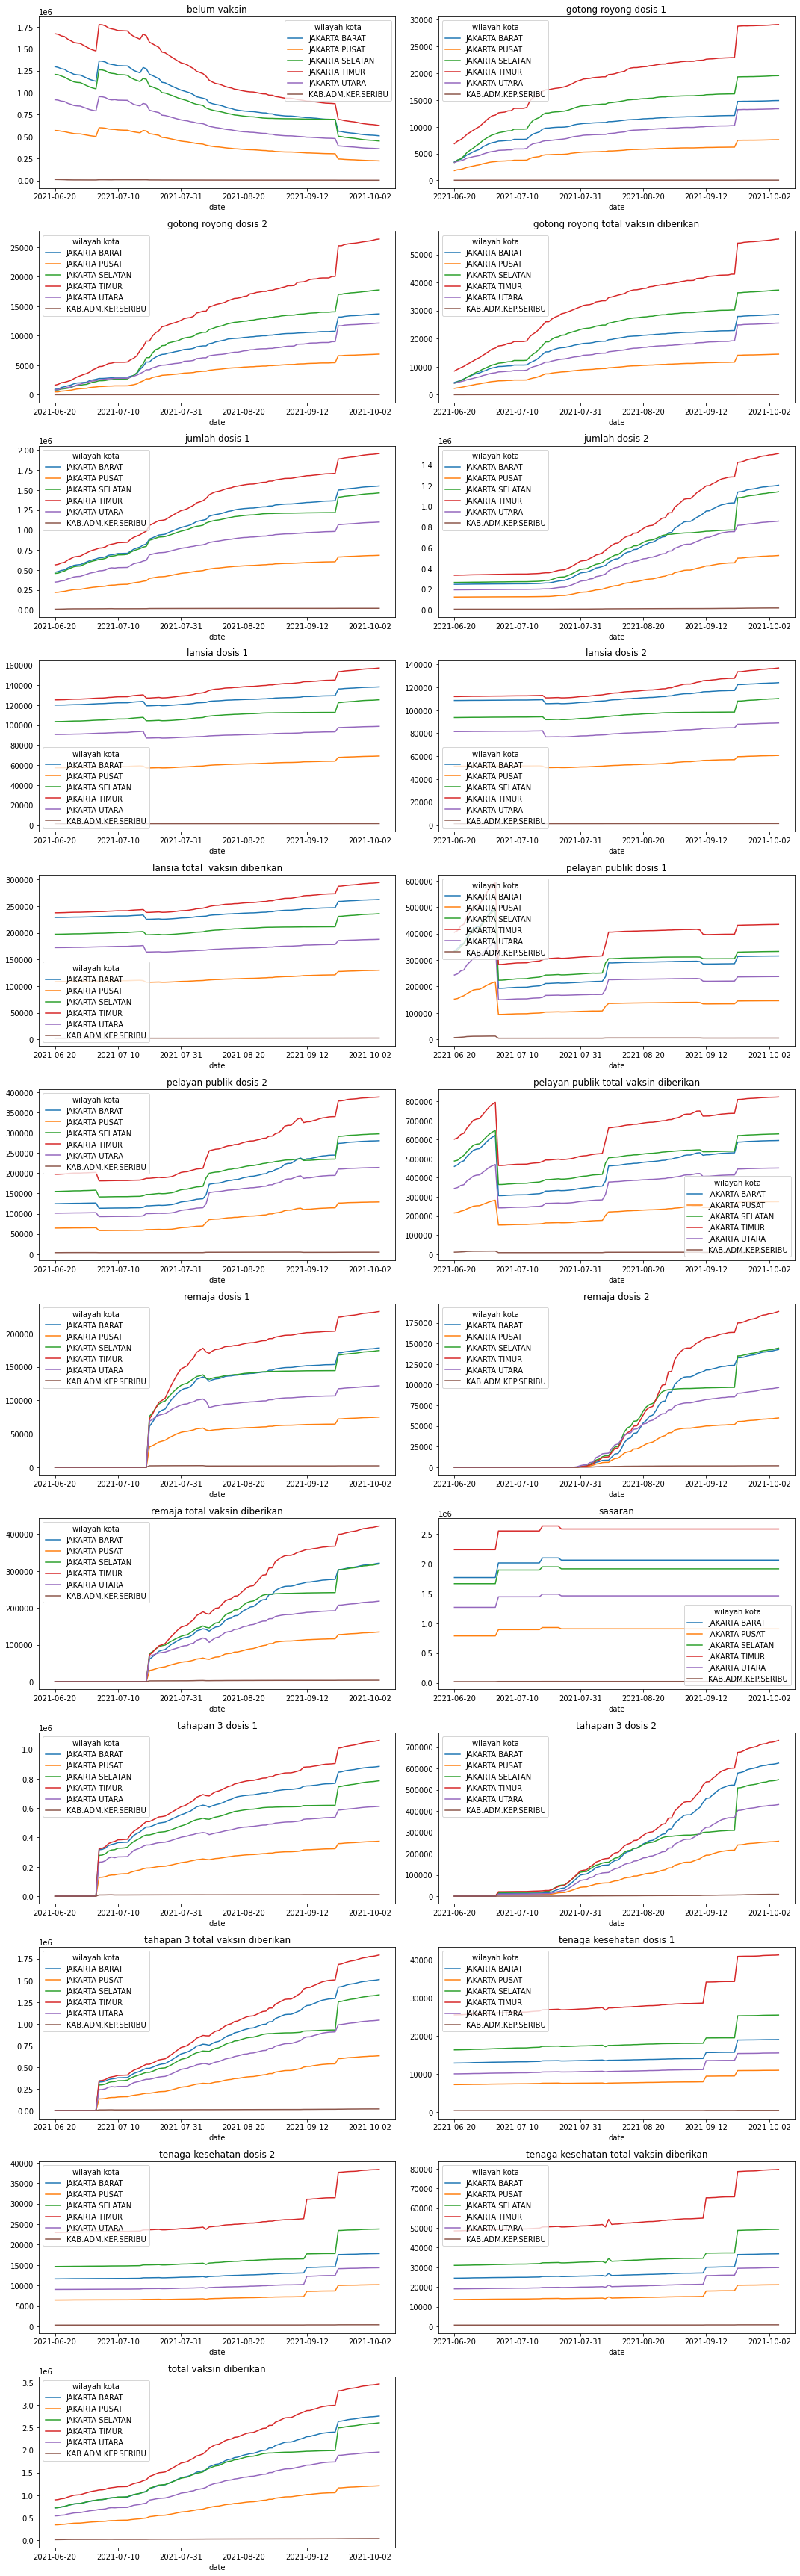

In [28]:
f = plt.figure(figsize=(15,4*12))
gs = f.add_gridspec(12,2)
gs_list = list(gs)[:23]

for grid,attr in zip(gs_list, vaccine_attr):
    ax = plt.subplot(grid)
    vaccine_pv[attr].plot(ax=ax)
    ax.set_title(attr, fontsize=12)
    
f.tight_layout()
f.savefig(os.path.join(os.getcwd(), 'Plots', 'vaccine time series.png'), format='png', bbox_inches='tight')

### COVID time series

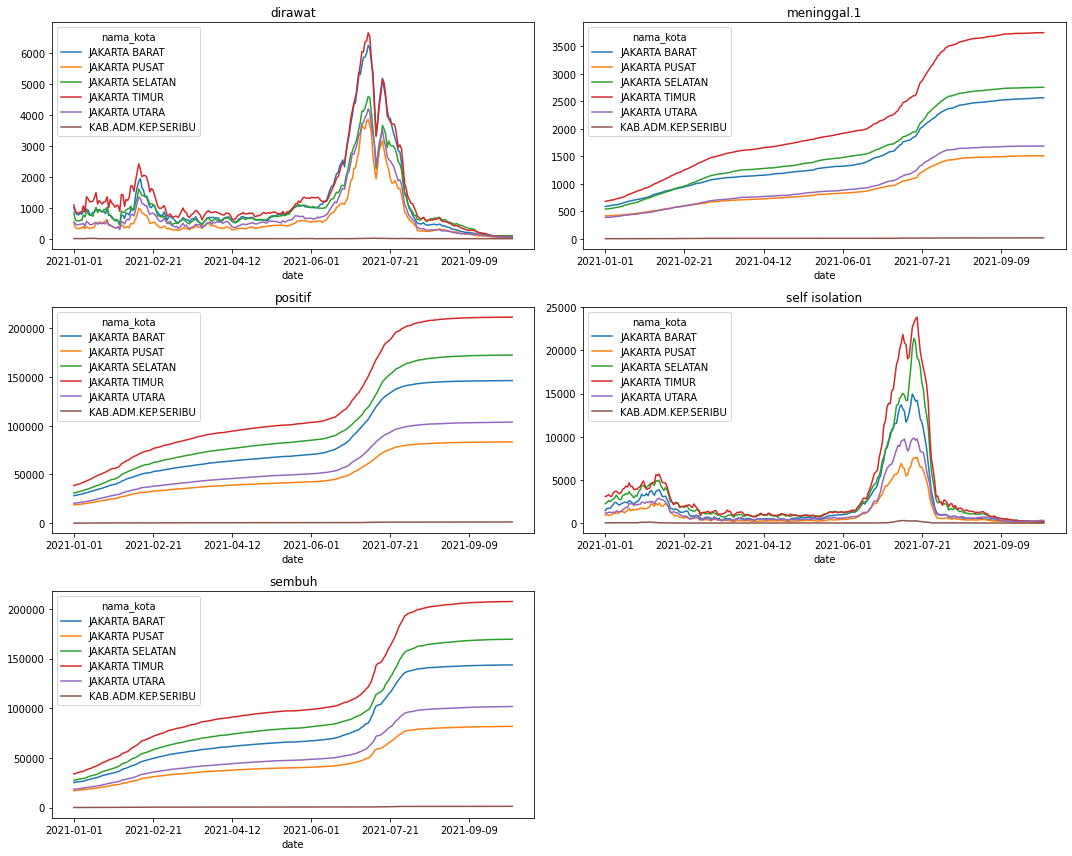

In [27]:
f = plt.figure(figsize=(15,4*3))
gs = f.add_gridspec(3,2)
gs_list = list(gs)[:5]

for grid,attr in zip(gs_list, covid_attr):
    ax = plt.subplot(grid)
    covid_pv[attr].plot(ax=ax)
    ax.set_title(attr, fontsize=12)
    
f.tight_layout()
f.savefig(os.path.join(os.getcwd(), 'Plots', 'covid time series.png'), format='png', bbox_inches='tight')